In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


In [944]:
train = pd.read_csv('train.csv')

In [946]:
train_original=train.copy()

In [948]:
train.shape

(31962, 3)

In [950]:
train_original

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [952]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

In [953]:
test_original=test.copy()

In [956]:
test.shape

(17197, 2)

In [958]:
test_original

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [960]:
combine = pd.concat([train, test], ignore_index=True, sort=True)


In [962]:

combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [964]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [ ]:
def remove_pattern(text,pattern):
    
   
    r = re.findall(pattern,text)
    
    
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [968]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], r"@[\w]*")
combine.head()


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [970]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

In [972]:
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [974]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fare talking before they leave. cha...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams.ð¯ can't think a...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,won!!! love land!!! #allin #cavs #champions #c...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here it's #gr8


In [976]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Tidy_Tweets, dtype: object

In [978]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [979]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: societi #motiv


In [982]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [984]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests


In [986]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

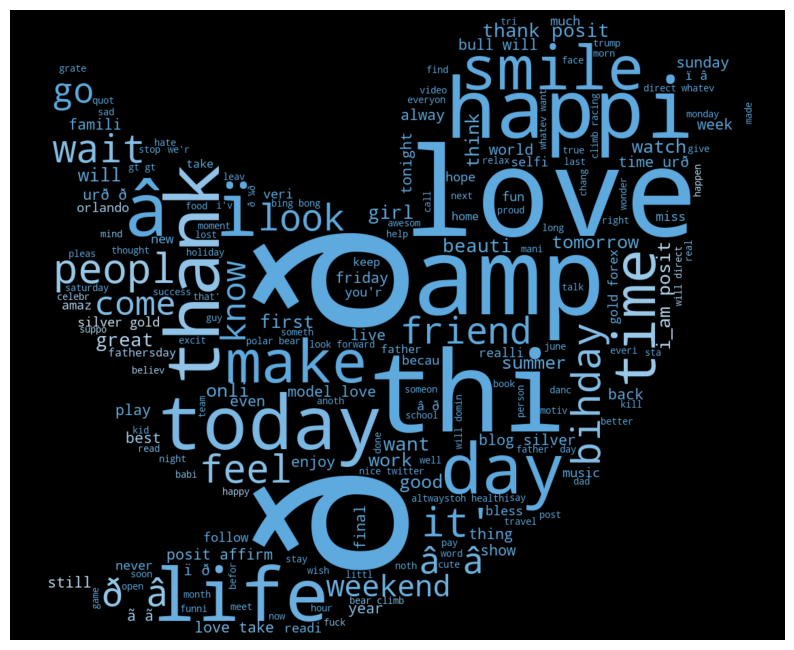

In [ ]:

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))


image_colors = ImageColorGenerator(Mask)


wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)


plt.figure(figsize=(10,20))


plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()


In [990]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

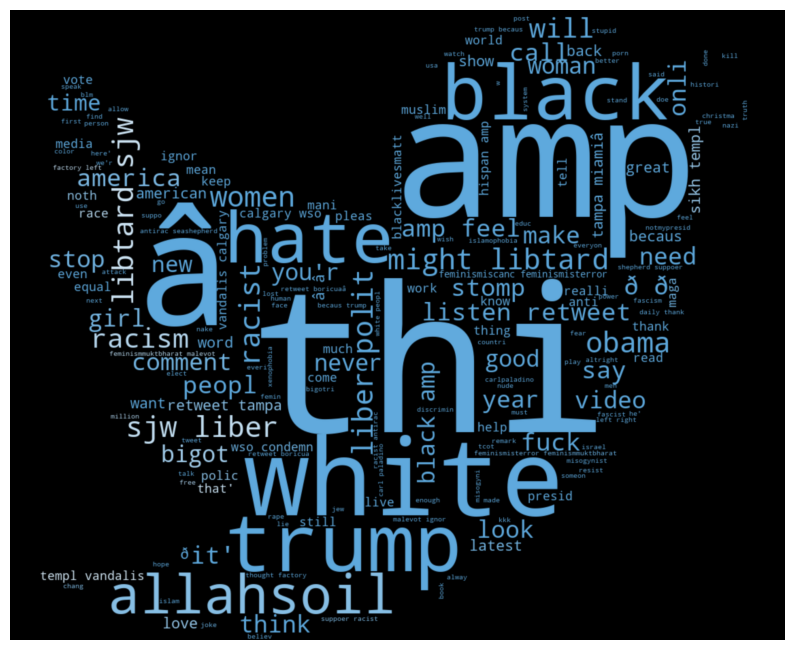

In [ ]:

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [ ]:
def Hashtags_Extract(x):
    hashtags=[]
    
   
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [996]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

In [998]:
ht_positive_unnest = sum(ht_positive,[])

In [999]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [1000]:
ht_negative_unnest = sum(ht_negative,[])

In [1001]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1576, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 526, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 362, ...})

In [1006]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [1008]:
df_positive.head(10)

,Hashtags,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374
5,motiv,195
6,allshowandnogo,1
7,school,27
8,exam,8
9,hate,26


In [1010]:
df_positive_plot = df_positive.nlargest(20,columns='Count') 

C:\Users\sridh\AppData\Local\Temp\ipykernel_18768\3011067775.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_positive_plot, y='Hashtags', x='Count', palette=rainbow_colors)


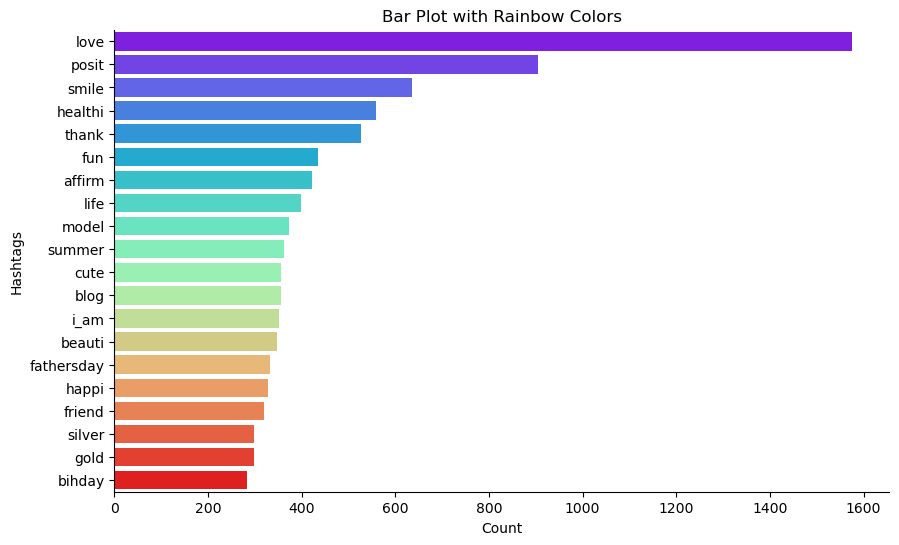

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb2hex


rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(df_positive_plot)))
rainbow_colors = [rgb2hex(c) for c in rainbow_colors]  


plt.figure(figsize=(10, 6))  
sns.barplot(data=df_positive_plot, y='Hashtags', x='Count', palette=rainbow_colors)
sns.despine()
plt.title("Bar Plot with Rainbow Colors")
plt.xlabel("Count")
plt.ylabel("Hashtags")
plt.show()

In [1014]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
word_freq_negative

FreqDist({'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 36, ...})

In [1016]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [1018]:
df_negative.head(10)

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,6
9,xenophobia,12


In [1020]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

C:\Users\sridh\AppData\Local\Temp\ipykernel_18768\958935574.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_negative_plot, y='Hashtags', x='Count', palette=rainbow_colors)


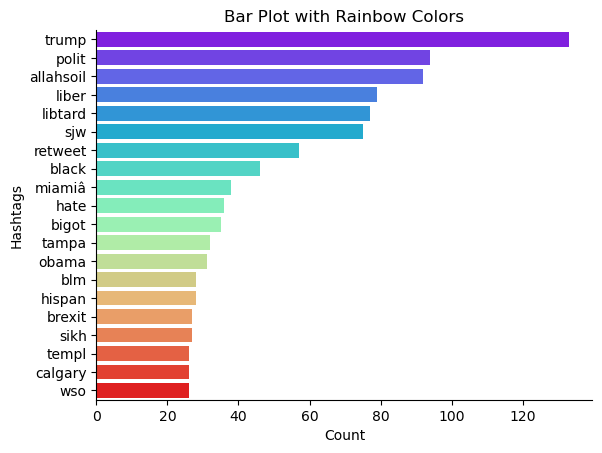

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb2hex


rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(df_negative_plot)))
rainbow_colors = [rgb2hex(c) for c in rainbow_colors]  


sns.barplot(data=df_negative_plot, y='Hashtags', x='Count', palette=rainbow_colors)
sns.despine()
plt.title("Bar Plot with Rainbow Colors")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')


bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1035]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1038]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [1040]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [1042]:
from sklearn.model_selection import train_test_split

In [1044]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [1046]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

In [1048]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [ ]:


Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [ ]:

prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.88522656e-01, 1.14773438e-02],
       [9.99902158e-01, 9.78419715e-05],
       [9.03848760e-01, 9.61512398e-02],
       ...,
       [7.06602565e-01, 2.93397435e-01],
       [9.43206058e-01, 5.67939417e-02],
       [9.63526312e-01, 3.64736878e-02]])

In [1054]:
from sklearn.metrics import f1_score

In [ ]:

prediction_int = prediction_bow[:,1] >= 0.3

prediction_int = prediction_int.astype(int)  # Use Python's built-in int


log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.584070796460177

In [1058]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [1060]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.98359438, 0.01640562],
       [0.98185847, 0.01814153],
       [0.91844664, 0.08155336],
       ...,
       [0.96093067, 0.03906933],
       [0.93586749, 0.06413251],
       [0.97920102, 0.02079898]])

In [1062]:
prediction_int = prediction_int.astype(int)  # Use Python's built-in int


In [1064]:
prediction_int = prediction_int.astype(np.int64)


In [ ]:
prediction_int

log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf
0.5862068965517241

0.5862068965517241

In [1068]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1070]:
from xgboost import XGBClassifier

In [1072]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=22, ...)

In [ ]:

xgb=model_bow.predict_proba(x_valid_bow)

xgb


array([[9.9187911e-01, 8.1209205e-03],
       [9.9935114e-01, 6.4886967e-04],
       [9.3785286e-01, 6.2147118e-02],
       ...,
       [9.4486654e-01, 5.5133436e-02],
       [9.3785286e-01, 6.2147118e-02],
       [9.3785286e-01, 6.2147118e-02]], dtype=float32)

In [ ]:

xgb = xgb[:, 1] >= 0.3


xgb_int = xgb.astype(int) 


xgb_bow = f1_score(y_valid_bow, xgb_int)

xgb_bow


0.588144726712856

In [1078]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=29, ...)

In [ ]:

xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9985354 , 0.00146458],
       [0.99644077, 0.00355925],
       [0.95706755, 0.04293242],
       ...,
       [0.90701455, 0.09298544],
       [0.95706755, 0.04293242],
       [0.9958374 , 0.0041626 ]], dtype=float32)

In [ ]:

xgb_tfidf = xgb_tfidf[:, 1] >= 0.3


xgb_int_tfidf = xgb_tfidf.astype(int)  


score = f1_score(y_valid_tfidf, xgb_int_tfidf)

score


0.5736196319018405

In [1084]:
from sklearn.tree import DecisionTreeClassifier

In [1086]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [1088]:

dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [1089]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [1092]:
dct_int_bow = dct_bow.astype(int)  # Use Python's built-in int


In [1094]:
dct_int_bow = dct_bow.astype(np.int64)


In [ ]:

dct_int_bow_single = dct_int_bow[:, 1]  


dct_score_bow = f1_score(y_valid_bow, dct_int_bow_single)


In [1098]:
dct_score_bow

0.474025974025974

In [1100]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [1102]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:

dct_tfidf = dct_tfidf[:, 1] >= 0.3

e
dct_int_tfidf = dct_tfidf.astype(int)  

dct_score_tfidf = f1_score(y_valid_tfidf, dct_int_tfidf)

dct_score_tfidf


0.5397324940991345

In [1106]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']


In [1108]:
score = [log_bow,xgb_bow,dct_score_bow,log_tfidf,score,dct_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,7)])

In [1110]:
compare.T

,1,2,3,4,5,6
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.584071,0.588145,0.474026,0.069307,0.57362,0.539732


In [1112]:
print(compare['Model'].head())


1    LogisticRegression(Bag-of-Words)
2               XGBoost(Bag-of-Words)
3          DecisionTree(Bag-of-Words)
4          LogisticRegression(TF-IDF)
5                     XGBoost(TF-IDF)
Name: Model, dtype: object


In [ ]:

compare['Model'] = compare['Model'].apply(lambda x: x[0] if isinstance(x, list) else x)


In [1116]:
compare['Model'] = compare['Model'].astype('category')


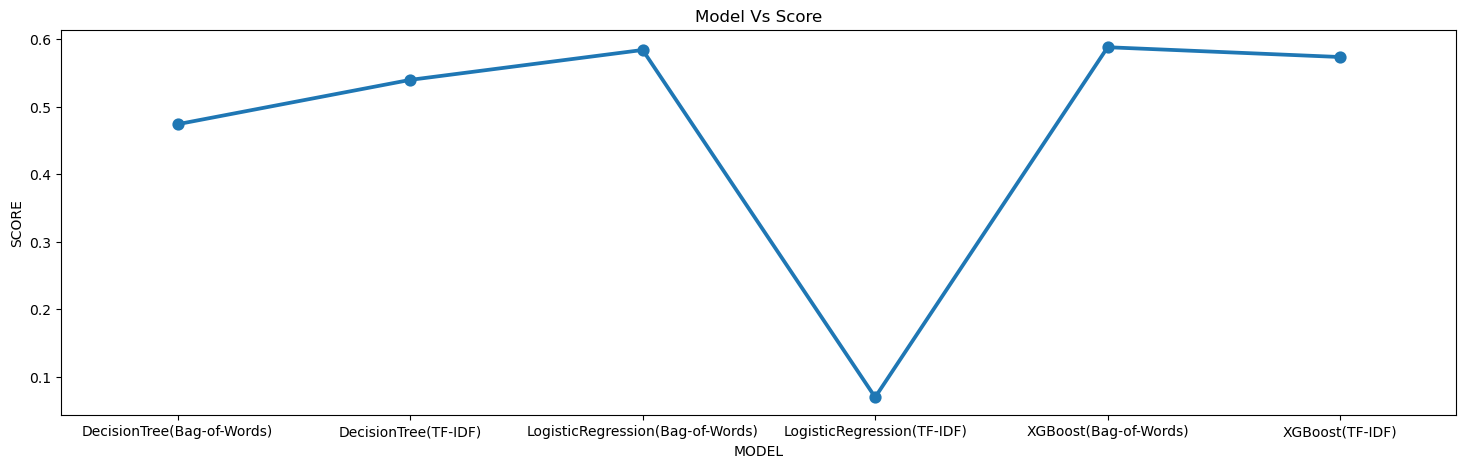

In [1118]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model', y='F1_Score', data=compare)
plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()


In [1120]:
test_tfidf = tfidf_matrix[31962:]

In [1122]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:, 1] >= 0.3

# Use `int` instead of `np.int`
test_pred_int = test_pred_int.astype(int)

test['label'] = test_pred_int

submission = test[['id', 'label']]

submission.to_csv('result.csv', index=False)


In [1124]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


In [1136]:
import matplotlib.pyplot as plt
import seaborn as sns 

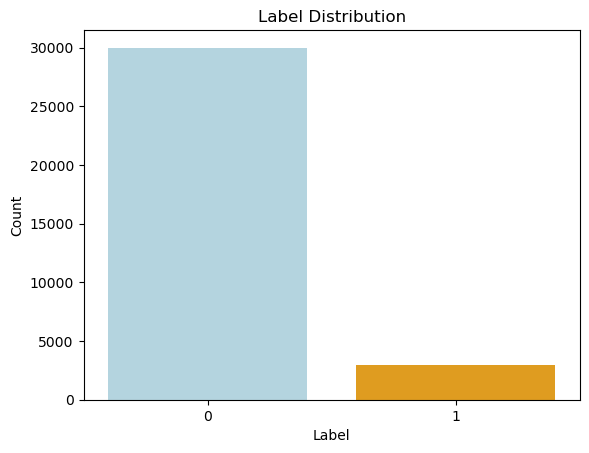

In [1146]:
sns.countplot(data=train_original, x='label', hue='label', palette={0: "lightblue", 1: "orange"})
plt.legend([], [], frameon=False)  # Optional: Removes the legend for cleaner visualization
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()